Catalogo
Normal     3613
Anómalo     295
Name: count, dtype: int64


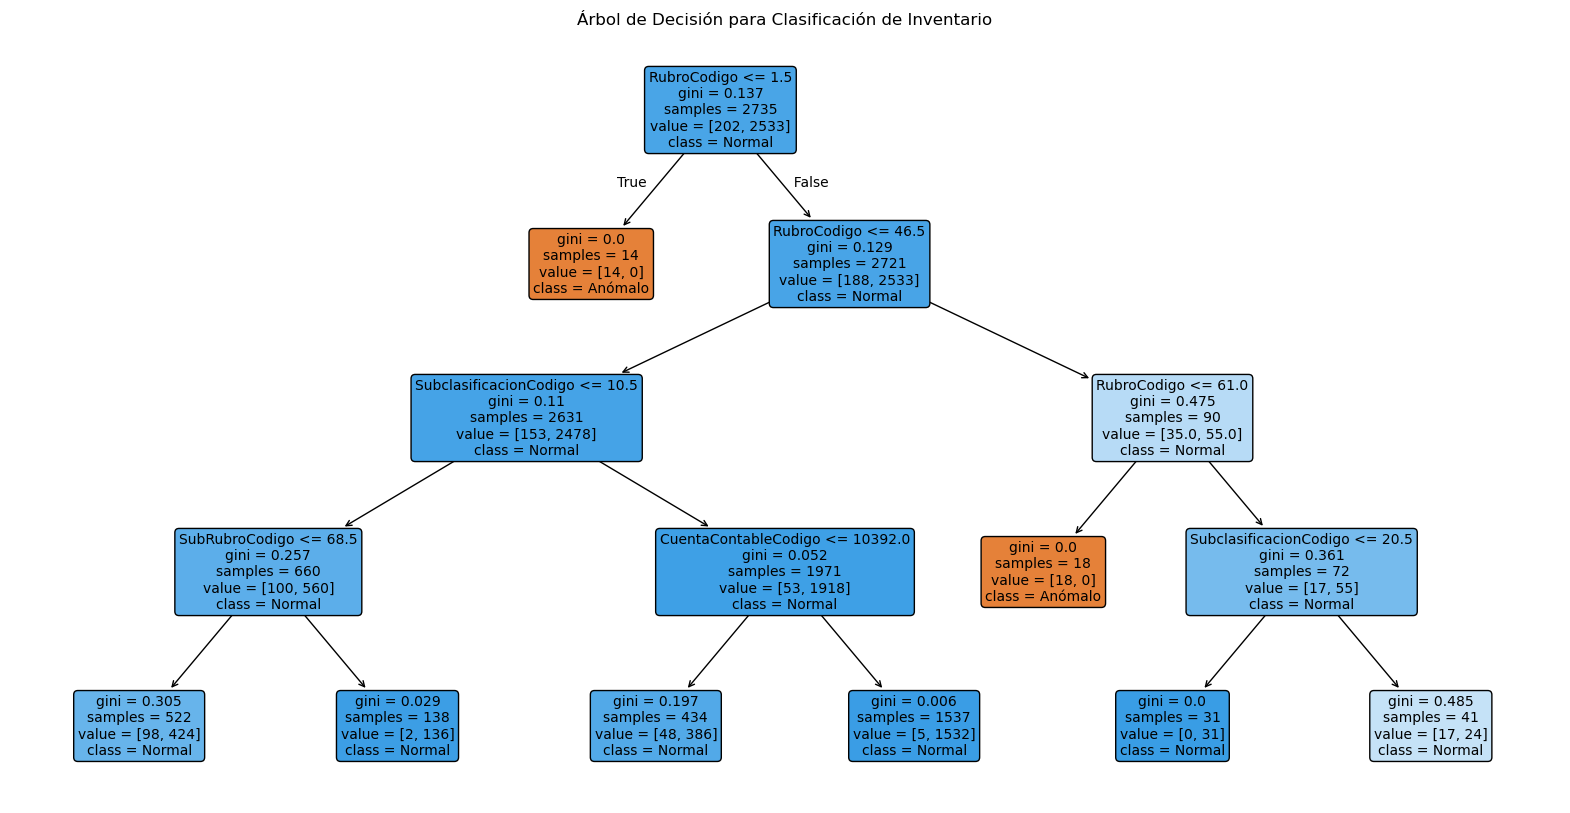

Precisión del modelo en el conjunto de prueba: 0.93


In [323]:
#arbol decision
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Crear la columna Catalogo basada en reglas personalizadas
# Regla 1: Incorporar etiquetas de anomalías (DBSCAN o LOF) si están disponibles
def clasificar_producto(row):
    
    if row.get('cluster_dbscan', 0) == -1 or row.get('Outlier', 0) == 1:
        return 'Anómalo'
    else:
        return 'Normal'

data['Catalogo'] = data.apply(clasificar_producto, axis=1)

# Verificar la distribución de las clases creadas
print(data['Catalogo'].value_counts())

# Supongamos que ya seleccionaste las columnas relevantes

columnas_relevantes = ['CuentaContableCodigo','ClasificacionCodigo', 'SubclasificacionCodigo', 'RubroCodigo','SubRubroCodigo' ]

data_seleccionada = data[columnas_relevantes]
data_seleccionada = data_seleccionada.dropna()

# Variable objetivo y predictores
y = data['Catalogo']
X = data_seleccionada

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenar un árbol de decisión
dt_model = DecisionTreeClassifier(max_depth=4, random_state=42)  # Ajusta max_depth si es necesario
dt_model.fit(X_train, y_train)

# Graficar el árbol de decisión
plt.figure(figsize=(20, 10))
plot_tree(
    dt_model, 
    feature_names=columnas_relevantes, 
    class_names=dt_model.classes_, 
    filled=True, 
    rounded=True, 
    fontsize=10
)
plt.title("Árbol de Decisión para Clasificación de Inventario")
plt.show()

# Evaluación básica del modelo
accuracy = dt_model.score(X_test, y_test)
print(f"Precisión del modelo en el conjunto de prueba: {accuracy:.2f}")

Catalogo2
Normal     3613
Anómalo     295
Name: count, dtype: int64


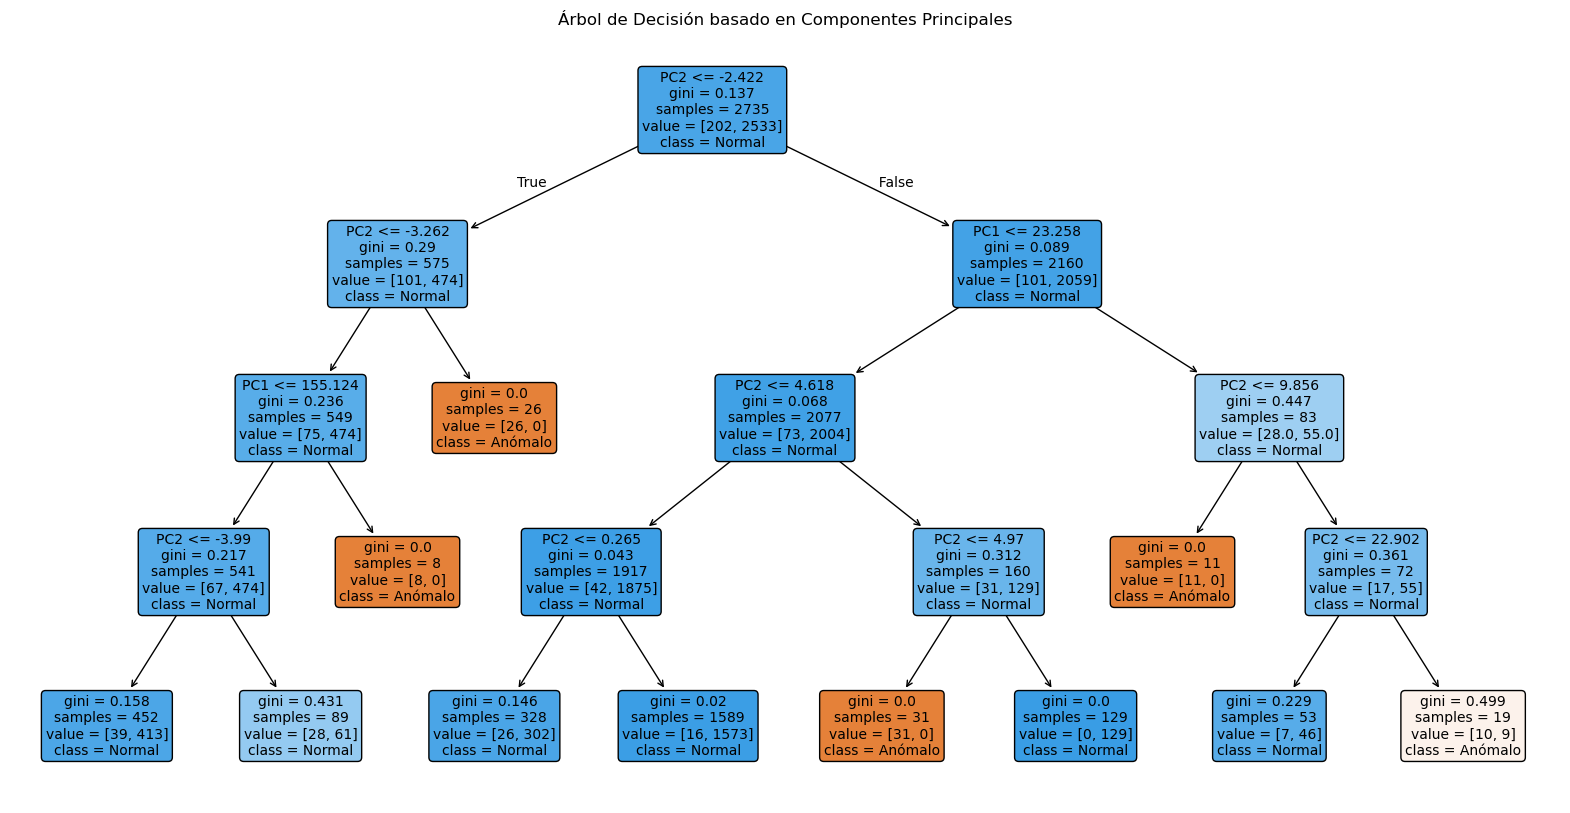

Precisión del modelo en el conjunto de prueba: 0.95


In [324]:
#arbol decision
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Crear la columna Catalogo2 basada en reglas personalizadas
# Regla 1: Incorporar etiquetas de anomalías (DBSCAN o LOF) si están disponibles
def clasificar_producto(row):
    if row.get('cluster_dbscan', 0) == -1 or row.get('Outlier', 0) == 1:
        return 'Anómalo'
    else:
        return 'Normal'

data['Catalogo2'] = data.apply(clasificar_producto, axis=1)

# Verificar la distribución de las clases creadas
print(data['Catalogo2'].value_counts())

# Usar las componentes principales obtenidas previamente como características
columnas_pca = ['PC1', 'PC2']
X = data[columnas_pca]
y = data['Catalogo2']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenar un árbol de decisión
dt_model = DecisionTreeClassifier(max_depth=4, random_state=42)  # Ajusta max_depth si es necesario
dt_model.fit(X_train, y_train)

# Graficar el árbol de decisión
plt.figure(figsize=(20, 10))
plot_tree(
    dt_model, 
    feature_names=columnas_pca, 
    class_names=dt_model.classes_, 
    filled=True, 
    rounded=True, 
    fontsize=10
)
plt.title("Árbol de Decisión basado en Componentes Principales")
plt.show()

# Evaluación básica del modelo
accuracy = dt_model.score(X_test, y_test)
print(f"Precisión del modelo en el conjunto de prueba: {accuracy:.2f}")


In [325]:
data.head(10)


,ProductoCodigo,Nombre,ImpuestoId,Impuesto,Descripcion,Activo,CuentaContableCodigo,CuentaContable,SubRubroCodigo,SubRubro,...,outlier,PC1,PC2,cluster,cluster_3,cluster_4,cluster_dbscan,target,Catalogo,Catalogo2
0,357,BATERIAS,1,IVA 21,BATERIAS DE VEHICULOS,1,10478,REPARACION Y MANTENIMIENTO DE RODADOS,28,BATERÍAS AUTOMOTICES,...,True,-51.793474,-4.735937,2,2,2,0,Anómalo,Anómalo,Anómalo
1,361,MATERIALES,1,IVA 21,MATERIALES PARA EL AREA DE PRODUCCION,1,10422,MATERIALES COMUNICACIÓN,71,ROUTER DE CONEXIÓN AÉREA Y PARA INTERIOR,...,False,-4.181758,-0.486802,0,0,0,1,Normal,Normal,Normal
2,364,ROPA DE TRABAJO,1,IVA 21,NaN,1,10372,ROPA DE TRABAJO,76,EQUIPAMIENTO Y MATERIALES AUDIO,...,False,2.181575,2.473514,0,0,0,2,Normal,Normal,Normal
3,372,COMBUSTIBLES Y LUBRICANTES,1,IVA 21,COMBUSTIBLES Y LUBRINCANTES.,1,10415,COMBUSTIBLES Y LUBRICANTES,159,REPARACIÓN Y MANTENIMIENTO RODADOS,...,False,96.949614,18.696982,3,1,3,3,Normal,Normal,Normal
4,373,MATERIALES ELECTRICOS,1,IVA 21,NaN,0,10420,MATERIALES ELECTRICOS,70,MATERIALES DE CONEXIONES VARIOS,...,False,-5.455004,-1.023043,0,0,0,1,Normal,Normal,Normal
5,384,MATERIALES DE COMUNICACION,1,IVA 21,MATERIALES DE COMUNICACION,0,10422,MATERIALES COMUNICACIÓN,70,MATERIALES DE CONEXIONES VARIOS,...,False,-5.455004,-1.023043,0,0,0,1,Normal,Normal,Normal
6,389,"MATERIALES DE COMUNICACIÓN AL 10,5",2,"IVA 10,5",NaN,0,10422,MATERIALES COMUNICACIÓN,70,MATERIALES DE CONEXIONES VARIOS,...,False,-5.455004,-1.023043,0,0,0,1,Normal,Normal,Normal
7,390,RESMAS,1,IVA 21,RESMAS AUTOR,1,10391,PAPELERIA E IMPRESIONES,87,PAPEL,...,False,14.796914,4.794449,0,0,0,2,Anómalo,Anómalo,Anómalo
8,391,PAPELERÍA,1,IVA 21,PAPELES- HOJAS.,1,10391,PAPELERIA E IMPRESIONES,87,PAPEL,...,False,14.796914,4.794449,0,0,0,2,Anómalo,Anómalo,Anómalo
9,392,MATERIALES DE FERRETERÍA,1,IVA 21,NaN,0,10599,MATERIALES VARIOS,86,ARTÍCULOS DE LIBRERÍA Y PAPELERÍA VARIOS,...,False,13.860961,5.146438,0,0,0,2,Normal,Normal,Normal


In [328]:
#arbol decision
# Comparo catalogo y catalogo2
comparacion = data['Catalogo'] == data['Catalogo2']

# Conteo de valores coincidentes
total_iguales = comparacion.sum()
total_diferentes = len(data) - total_iguales
porcentaje_iguales = (total_iguales / len(data)) * 100

print(f"Total de valores iguales: {total_iguales}")
print(f"Total de valores diferentes: {total_diferentes}")
print(f"Porcentaje de coincidencia: {porcentaje_iguales:.2f}%")




Total de valores iguales: 3908
Total de valores diferentes: 0
Porcentaje de coincidencia: 100.00%
